Importing relevant functionalities

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import kde
from pandas import DataFrame as df
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

Preparing plots

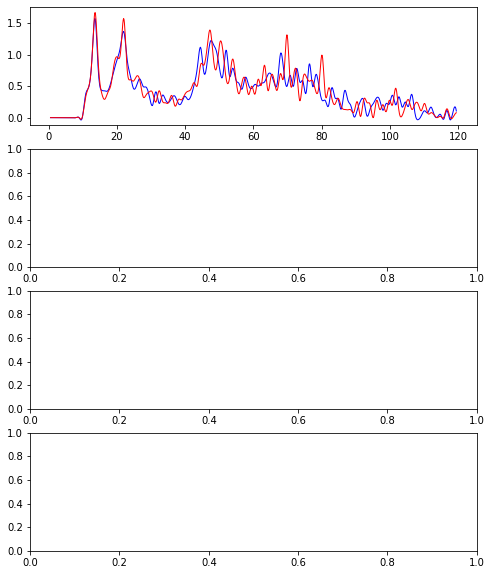

In [24]:
M7382 = {}
M3936 = {}
M3843 = {}
M3719 = {}
M7382 = pd.read_csv('../csv_files/reconstructed_7382.csv',header=0)
M3936 = pd.read_csv('../csv_files/reconstructed_3936.csv',header=0)
M3843 = pd.read_csv('../csv_files/reconstructed_3843.csv',header=0)
M3719 = pd.read_csv('../csv_files/reconstructed_3719.csv',header=0)

# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))
# axes[0].grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)
# axes[1].grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)
# axes[2].grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)
# axes[3].grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)

#sns.kdeplot(M7382.predicted[:]*54,bw_method=0.05,ax=axes[0],label='QML-predicted')
#sns.kdeplot(M7382.tddft[:]*54,bw_method=0.05,ax=axes[0],label='TDDFT')

#sns.kdeplot(M3936.predicted[:]*54,bw_method=0.05,ax=axes[1],label='QML-predicted')
#sns.kdeplot(M3936.tddft[:]*54,bw_method=0.05,ax=axes[1],label='TDDFT')

# sns.kdeplot(M3843.predicted[:]*63,bw_method=0.05,ax=axes[2],label='QML-predicted')
# sns.kdeplot(M3843.tddft[:]*63,bw_method=0.05,ax=axes[2],label='TDDFT')

# sns.kdeplot(M3719.predicted[:]*61,bw_method=0.05,ax=axes[3],label='QML-predicted')
# sns.kdeplot(M3719.tddft[:]*61,bw_method=0.05,ax=axes[3],label='TDDFT')

# k = sns.kdeplot(M3719.tddft[:]*61,bw_method=0.05,ax=axes[3],label='TDDFT')
# plt.xticks(k.get_xticks()*120)

#plt.plot(x,M7382_dens_p(x)*54,label='QML-predicted',color='blue',zorder=3,linewidth=1.0 )
# plt.legend(labels=["QML-predicted","TDDFT"],frameon=True, loc='lower right',ncol=1)
# plt.show()

dx=120.0/128.0
x=np.zeros(128)
for i in range(0,128):
    x[i]=i*dx+dx/2
    
dx=(119.53125-0.46875)/1000.0
x_grids=np.zeros(1000)
for i in range(0,1000):
    x_grids[i]=0.46875+i*dx+dx/2
    

# print(x)
# print(x_grids)
M7382_dens_p = kde.gaussian_kde(M7382.predicted[:])
M7382_dens_t = kde.gaussian_kde(M7382.tddft[:])
M3936_dens_p = kde.gaussian_kde(M3936.predicted[:])
M3936_dens_t = kde.gaussian_kde(M3936.tddft[:])
M3843_dens_p = kde.gaussian_kde(M3843.predicted[:])
M3843_dens_t = kde.gaussian_kde(M3843.tddft[:])
M3719_dens_p = kde.gaussian_kde(M3719.predicted[:])
M3719_dens_t = kde.gaussian_kde(M3719.tddft[:])

M7382_dens_p.covariance = lambda : .25
M7382_dens_p._compute_covariance()
M7382_dens_t.covariance = lambda : .25
M7382_dens_t._compute_covariance()
M3936_dens_p.covariance = lambda : .25
M3936_dens_p._compute_covariance()
M3936_dens_t.covariance = lambda : .25
M3936_dens_t._compute_covariance()
M3843_dens_p.covariance = lambda : .25
M3843_dens_p._compute_covariance()
M3843_dens_t.covariance = lambda : .25
M3843_dens_t._compute_covariance()
M3719_dens_p.covariance = lambda : .25
M3719_dens_p._compute_covariance()
M3719_dens_t.covariance = lambda : .25
M3719_dens_t._compute_covariance()


fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

# ax.set_xticks(x1,minor=False)
# ax.tick_params(direction="in",which='both')
# ax.set_xlim([0,120])
# ax.set_ylim([0,1.6])
#ax[0].legend(frameon=True, loc='lower right',ncol=1)

from scipy import interpolate

f=interpolate.interp1d(x, M7382.predicted, kind='cubic')
M7382_pred_int=f(x_grids)
f=interpolate.interp1d(x, M7382.tddft, kind='cubic')
M7382_tddft_int=f(x_grids)

ax[0].plot(x_grids, M7382_pred_int[:]*54, label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
ax[0].plot(x_grids, M7382_tddft_int[:]*54, label='TDDFT',color='red',zorder=3,linewidth=1.0)

#ax[1].plot(x, M3936_dens_p(x), label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
#ax[1].plot(x, M3936_dens_t(x), label='TDDFT',color='red',zorder=3,linewidth=1.0)

#ax[2].plot(x, M3843_dens_p(x), label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
#ax[2].plot(x, M3843_dens_t(x), label='TDDFT',color='red',zorder=3,linewidth=1.0)

#ax[3].plot(x, M3719_dens_p(x), label='QML-predicted',color='blue',zorder=3,linewidth=1.0)
#ax[3].plot(x, M3719_dens_t(x), label='TDDFT',color='red',zorder=3,linewidth=1.0)

